<a href="https://colab.research.google.com/github/AlGhifaryAN/MachineLearningTasksTK44G4/blob/main/PolynomialRegressionDataPublic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Nama  : Al Ghifary Akmal Nasheeri
#NIM   : 1103201242
#Kelas : TK-44-G4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [ ]:
# Define the path to your dataset in Google Drive
dataset_path = '/content/drive/MyDrive/Dataset/AgeandIncome.csv'

# Use Pandas to read the CSV file
df = pd.read_csv(dataset_path)

# Now, you can work with your dataset using the 'df' DataFrame
print(df.head())

   Age  Income
0   28   45000
1   35   52000
2   42   60000
3   50   65000
4   60   72000


In [ ]:
# Replace 'your_dataset_path.csv' with the actual path to your dataset on Google Drive
dataset_path = '/content/drive/MyDrive/Dataset/AgeandIncome.csv'
df = pd.read_csv(dataset_path)

# Assuming you have columns 'Age' and 'Income' in your dataset
x = df[['Age']]
y = df['Income']


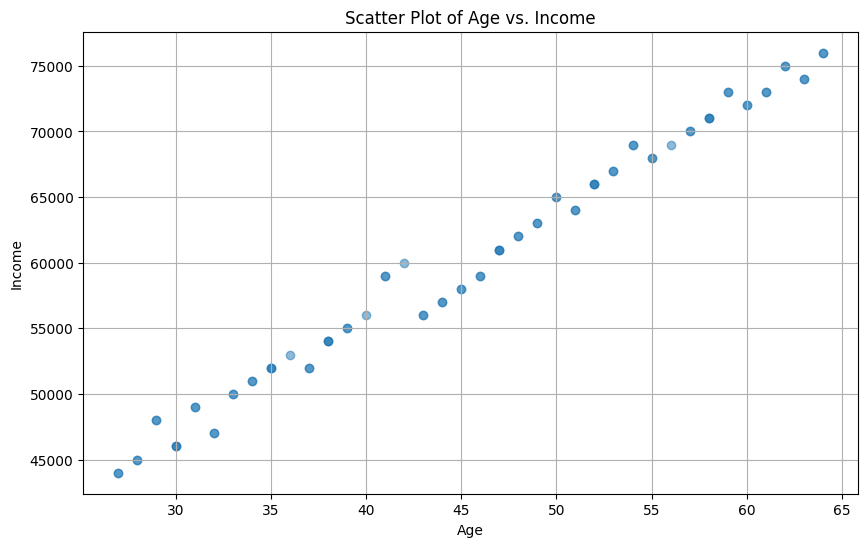

In [ ]:
# Assuming you have a DataFrame called 'df' with columns 'Number of Units' and 'Manufacturing Cost'
# You can access these columns as df['Number of Units'] and df['Manufacturing Cost']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Income'], alpha=0.5)
plt.title('Scatter Plot of Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)
plt.show()


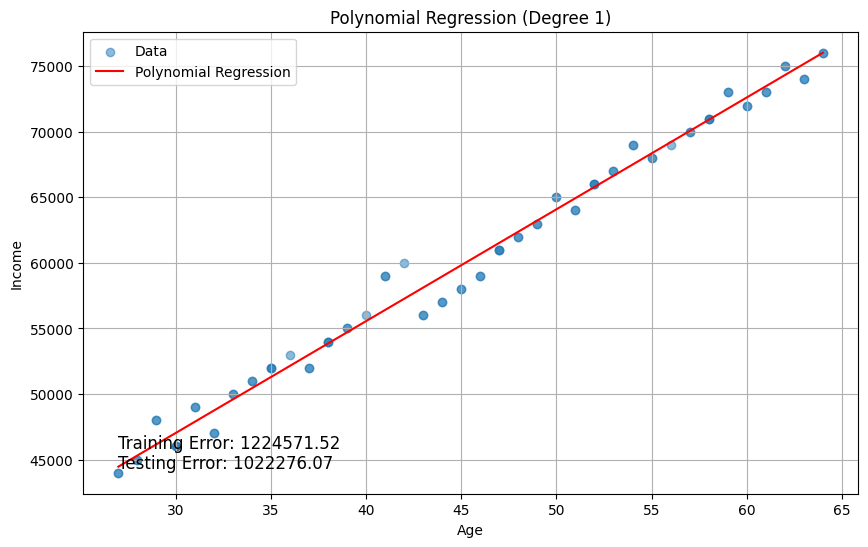

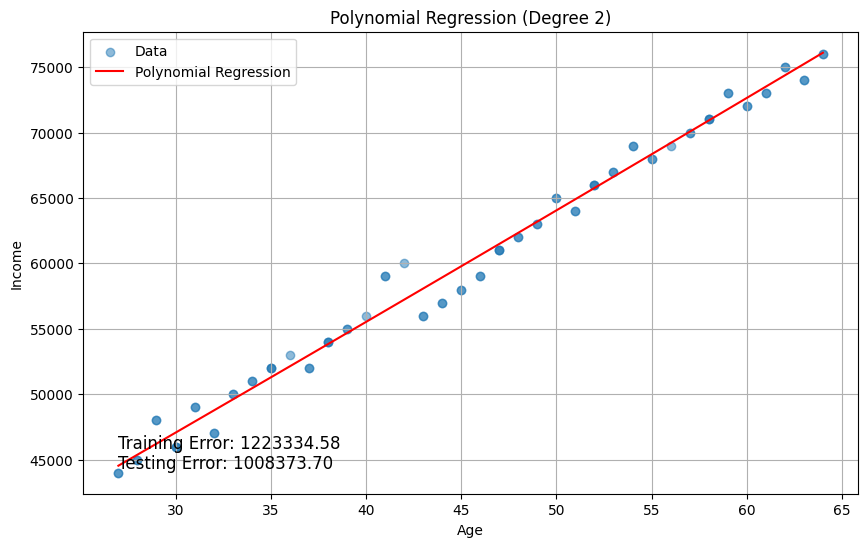

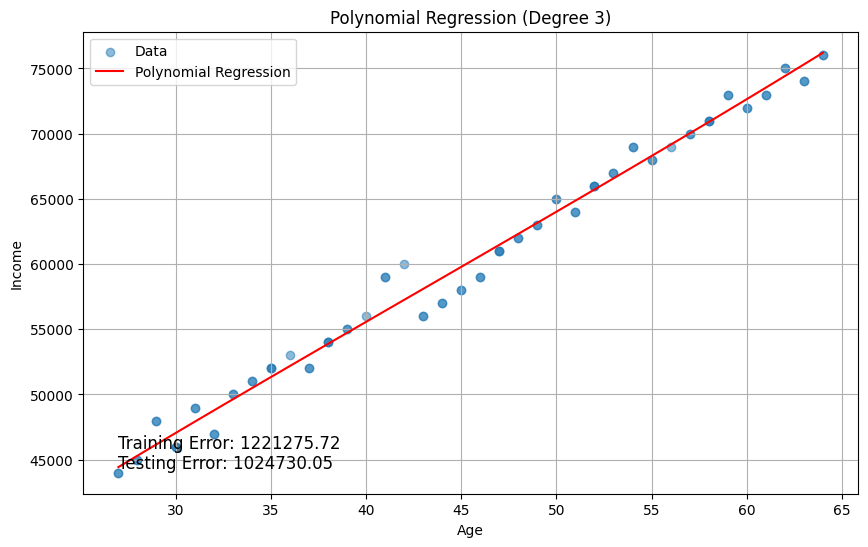

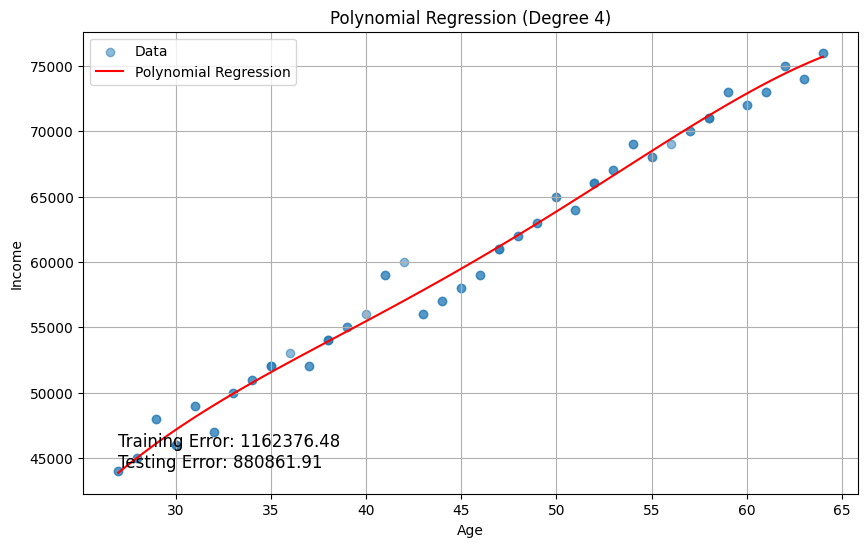

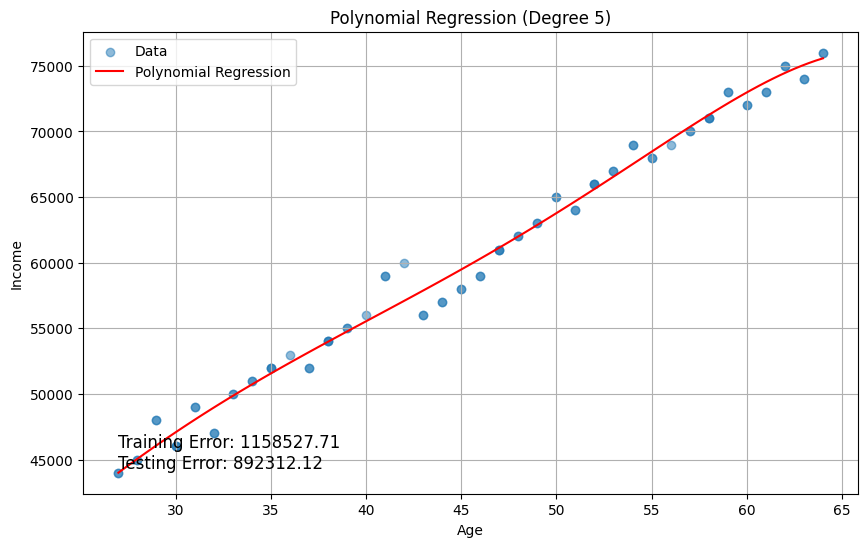

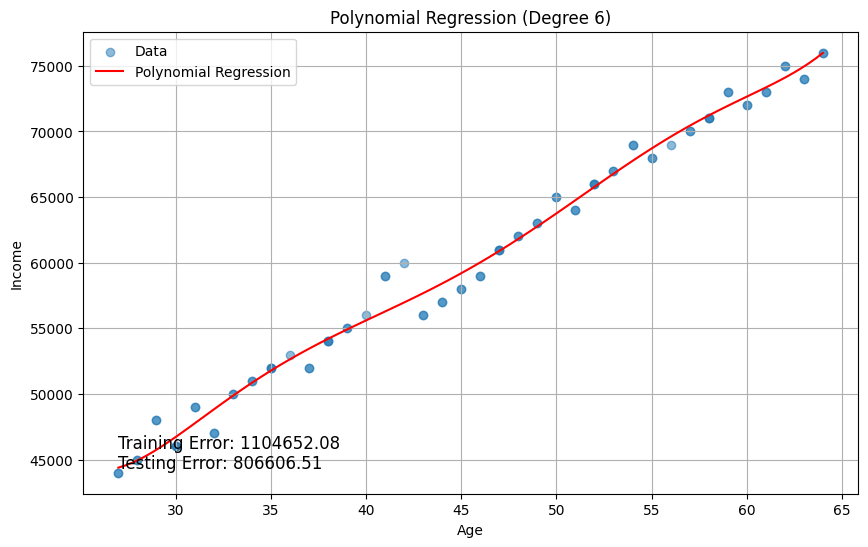

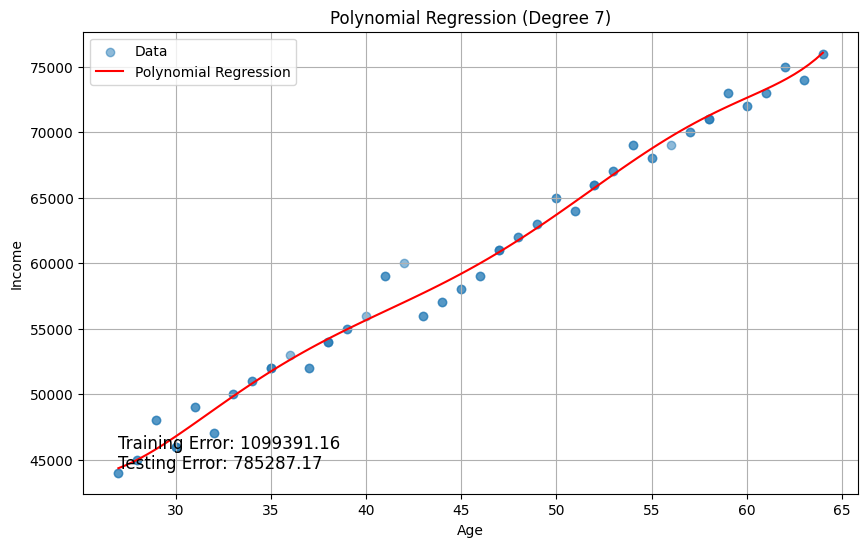

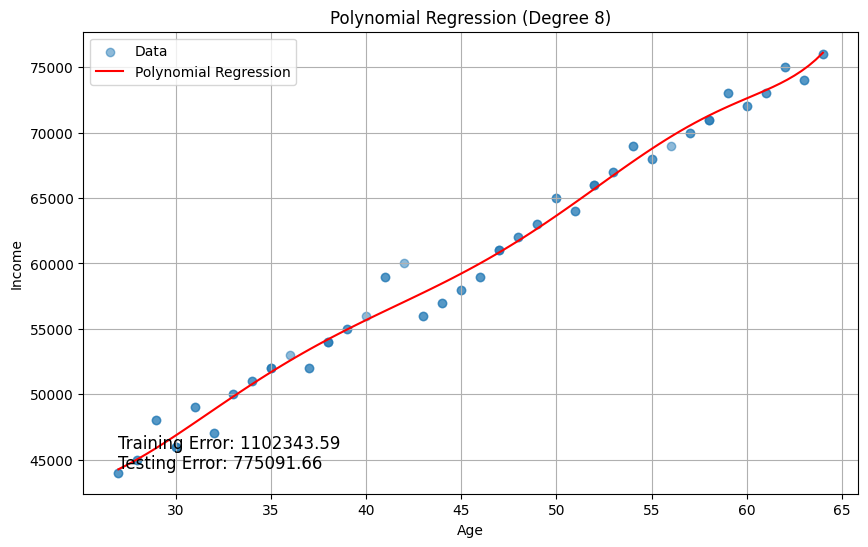

In [ ]:
# Assuming your DataFrame is named 'data' and contains columns 'Age' and 'Income'
X = df['Age'].values.reshape(-1, 1)  # Independent variable (Age)
y = df['Income'].values  # Dependent variable (Income)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define degrees for polynomial regression
degrees = np.arange(1, 9)

# Loop through each degree and create individual plots
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Predictions
    train_pred = model.predict(X_poly_train)
    test_pred = model.predict(X_poly_test)

    # Calculate training and testing error
    train_error = mean_squared_error(y_train, train_pred)
    test_error = mean_squared_error(y_test, test_pred)

    # Create a new figure for each degree
    plt.figure(figsize=(10, 6))

    # Scatter plot of the data
    plt.scatter(X, y, alpha=0.5, label='Data')

    # Plot the regression curve
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_poly_range = poly.transform(X_range)
    y_pred_range = model.predict(X_poly_range)
    plt.plot(X_range, y_pred_range, color='red', label='Polynomial Regression')

    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Age')
    plt.ylabel('Income')
    plt.legend()
    plt.grid(True)

    # Display training and testing errors
    plt.text(X.min(), y.min(), f'Training Error: {train_error:.2f}\nTesting Error: {test_error:.2f}', fontsize=12, va='bottom')

    # Show the individual plot for this degree
    plt.show()
